In [5]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
root = "D:\\Dropbox\\2. Cognitive science\\Music evoked autobiographical memories\\"
root2 = "C:\\Users\Felix\Dropbox\\2. Cognitive science\\Music evoked autobiographical memories\\"
code_loc = os.path.join(root2, "code\\pipeline\\")
sys.path.append(code_loc)

In [3]:
from M_Pipeline import Mpipe

c:\Users\Felix\Dropbox\2. Cognitive science\Music evoked autobiographical memories\M_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pipe = Mpipe(root2, r"data\SBERT\SBERT-L6-v2_embed.csv", "data\\SBERT\\")

Mpipe initialised.
loaded data from: C:\Users\Felix\Dropbox\2. Cognitive science\Music evoked autobiographical memories\data\SBERT\SBERT-L6-v2_embed.csv

-Type: <class 'pandas.core.frame.DataFrame'>
-Shape:(1430, 384)
- -Obervations: 1430
- -Features/measures: 384



In [7]:
pipe.data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_375,Feature_376,Feature_377,Feature_378,Feature_379,Feature_380,Feature_381,Feature_382,Feature_383,Feature_384
0,-0.042112,0.091219,0.000091,-0.030104,0.004176,0.019816,0.028734,-0.050748,-0.052178,-0.055782,...,0.018921,-0.034404,-0.101011,-0.007880,-0.075083,-0.020815,0.022252,0.082778,-0.037813,-0.068431
1,-0.000563,0.035439,0.016838,0.034188,0.082212,-0.001630,0.066283,-0.043782,0.036031,-0.103457,...,0.075590,0.047303,-0.132332,0.062682,-0.033418,-0.019511,0.103777,0.094574,-0.053418,0.011212
2,-0.051531,0.014741,-0.002534,-0.071672,0.040086,0.008471,0.015279,-0.063403,0.026789,-0.047175,...,-0.008393,0.069189,-0.049235,0.038515,0.013322,-0.059914,0.085661,0.062052,-0.143265,-0.091430
3,0.030427,0.046702,0.061173,0.036397,0.114037,0.022050,0.064021,-0.050022,0.036622,-0.108996,...,0.033690,0.004755,-0.106003,0.105326,-0.073503,-0.035666,0.022746,0.048553,-0.079947,-0.032474
4,0.000022,0.024498,0.065740,0.014166,0.116068,0.000735,0.022005,-0.047574,0.043648,-0.007325,...,0.076149,0.055597,-0.085557,0.034770,-0.064969,-0.057286,0.049412,0.074945,-0.145021,-0.080316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0.009249,-0.040311,0.004107,-0.049341,-0.029124,-0.045151,0.027983,-0.053130,0.038263,-0.048039,...,0.059098,0.028215,-0.065937,0.066920,0.069625,-0.021417,0.112544,0.166719,-0.114838,-0.017881
1426,-0.072453,0.012191,0.009704,-0.000355,0.017255,-0.057014,0.106527,-0.091704,0.003846,-0.169021,...,0.077813,-0.023028,-0.077113,0.068988,0.001605,-0.055599,-0.015433,0.057546,-0.068084,-0.066423
1427,0.039191,0.023733,0.036337,-0.059261,0.041687,-0.081789,0.104119,-0.038085,-0.038731,-0.076467,...,0.069558,0.070727,-0.063674,-0.005436,-0.024208,0.002981,0.113471,0.012447,-0.132051,-0.017358
1428,0.001489,-0.010541,-0.005793,0.002782,0.053077,0.091506,0.017804,0.011481,0.051128,-0.118067,...,0.084689,-0.008482,-0.026000,0.022507,-0.048467,-0.049566,0.063365,0.141803,-0.070297,-0.087534


In [8]:
umap_args = {"n_components":2, "n_neighbors":15, "random_state":2025} # args for umapp dim reduction 
umap = pipe.UMAP_reduce(pipe.data, umap_args)

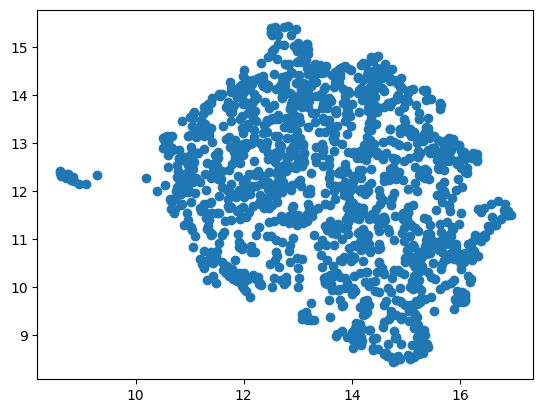

In [ ]:
plt.scatter(umap["Feature_1"], umap["Feature_2"])

In [9]:
km_args = {"n_clusters":5, "random_state":2025} # args for kmeans clustering (n_clusters arbitrary)
from sklearn.metrics import silhouette_score

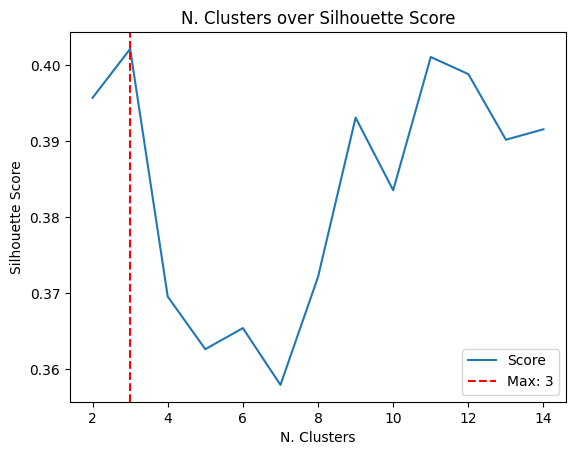

In [16]:
scores = []
for n_c in range(2,15):
    km_args["n_clusters"] = n_c
    kmeans = pipe.KMEANS(umap, km_args)
    scores.append(silhouette_score(umap, kmeans.values.ravel()))

plt.plot(range(2,len(scores)+2), np.array(scores).reshape(-1));plt.title("N. Clusters over Silhouette Score"); plt.xlabel("N. Clusters")
plt.ylabel("Silhouette Score")
high = max(scores)
plt.axvline(scores.index(high)+2, c="red", linestyle="--"); plt.legend(["Score", f"Max: {scores.index(high)+2}"])
plt.savefig(os.path.join(pipe.output, "KMeans S_score 2-15.png"), dpi=400)

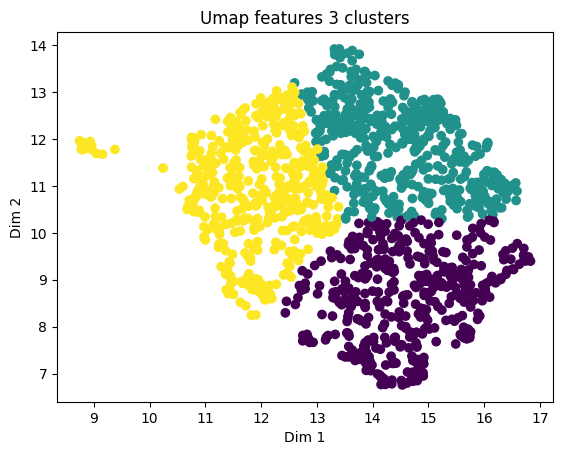

In [18]:
km_args["n_clusters"]=3
kmeans = pipe.KMEANS(umap, km_args)
plt.scatter(umap["Feature_1"], umap["Feature_2"], c=kmeans.values); plt.title("Umap features 3 clusters")
plt.xlabel("Dim 1");plt.ylabel("Dim 2")
plt.savefig(os.path.join(pipe.output, "UMAP 2F 15 NN\\Umap scatter 3 KM clusters.png"), dpi=400)

In [ ]:
pipe.save(kmeans, "KMeans 3")

DataFrame of shape (1430, 1) saved to C: ... \\KMeans 11.csv


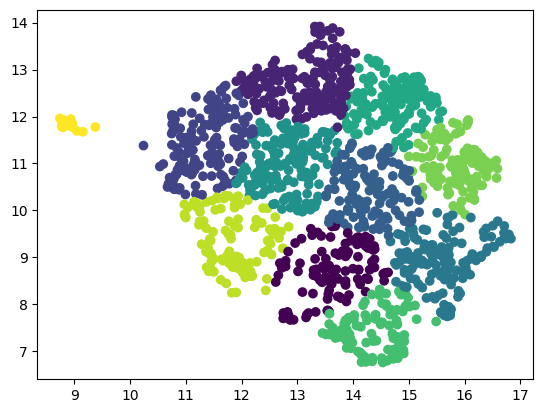

In [19]:
km_args["n_clusters"]=11
kmeans = pipe.KMEANS(umap, km_args)
plt.scatter(umap["Feature_1"], umap["Feature_2"], c=kmeans.values)
pipe.save(kmeans, "KMeans 11")

In [ ]:
fuzzyc_params = {"n_clusters": 4, "error":0.005, "maxiter": 1000, "random_state":None}


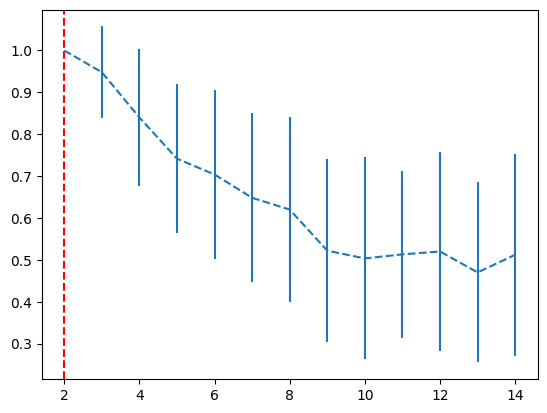

In [ ]:
scores = []
stds = []
Init = 50
for n_c in range(2,15):
    temp = np.zeros(Init)
    for i in range(Init):
        fuzzyc_params["n_clusters"] = n_c
        kfuzzy, score = pipe.FUZZYCMEANS(umap, fuzzyc_params, score=True)
        temp[i] = score
    scores.append(np.mean(temp))
    stds.append(np.std(temp))

plt.errorbar(range(2,len(scores)+2), np.array(scores).reshape(-1), yerr=stds, fmt='--')
plt.title("Fuzzy C Means score")
high = max(scores)
plt.axvline(scores.index(high)+2, c="red", linestyle="--");plt.legend(["scores", "max"])

In [ ]:
red = (0.86, 0.08, 0.24); blue = (0.0, 0.48, 1.0); green = (0.75, 1.0, 0.0); 
purple = (0.56, 0.0, 1.0); yellow = (1.0, 0.84, 0.0)
colours = np.array([red, blue, green, purple, yellow], dtype=np.float64)

In [ ]:
import skfuzzy

In [ ]:
fuzzyc_params["n_clusters"] = 3
# kfuzzy, cntr = pipe.FUZZYCMEANS(umap, fuzzyc_params,centroids=True)
fuzz, cntr, _, _, _, _, fpc = skfuzzy.cluster.cmeans(umap, 
                                                          c=3,
                                                          m=2, error=fuzzyc_params["error"], 
                                                          maxiter=fuzzyc_params["maxiter"], 
                                                          init=None)
fuzz=fuzz.T

In [ ]:
fuzz

array([[12.97613716, 12.97613716, 13.24303436],
       [13.92714214, 13.92714214, 14.07535839],
       [14.92578793, 14.92578793, 14.14897251],
       ...,
       [13.59534931, 13.59534931, 11.3785553 ],
       [10.91848564, 10.91848564, 12.02065563],
       [13.58644581, 13.58644581, 12.37836075]])

In [ ]:
cntr.shape

(3, 2)

C:\Users\felix\AppData\Local\Temp\ipykernel_300864\2617973294.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])


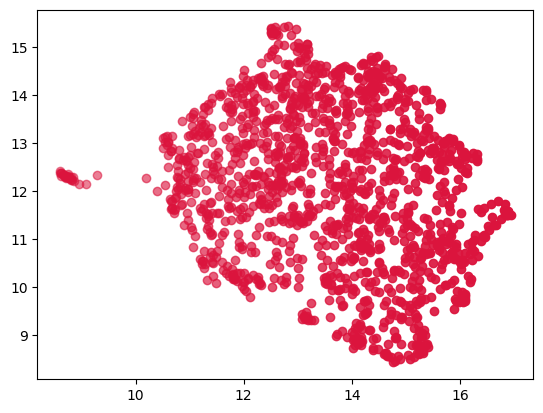

In [ ]:
ind = 0
for i in range(umap.shape[0]):
    a = (fuzz[i,ind])/np.max(fuzz)
    plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])

C:\Users\felix\AppData\Local\Temp\ipykernel_300864\1744231429.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])


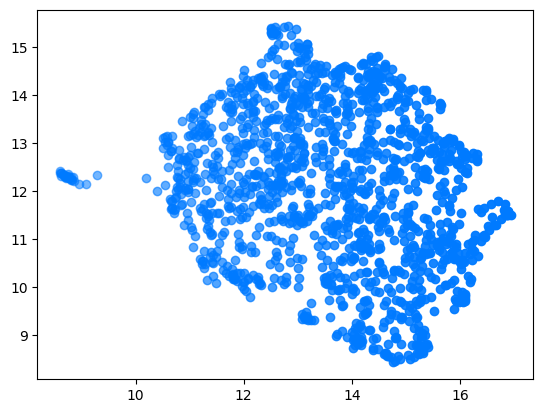

In [ ]:
ind = 1
for i in range(umap.shape[0]):
    a = (fuzz[i,ind])/np.max(fuzz)
    plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])

C:\Users\felix\AppData\Local\Temp\ipykernel_300864\719996295.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])


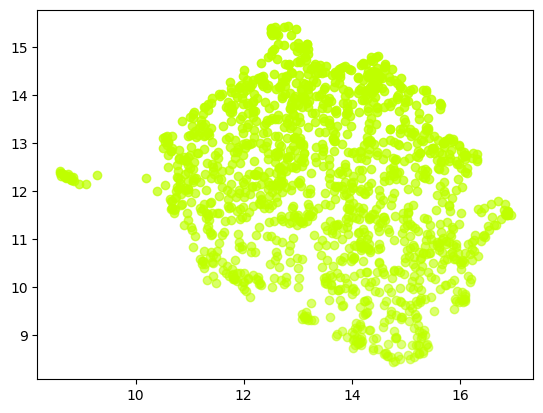

In [ ]:
ind = 2
for i in range(umap.shape[0]):
    a = (fuzz[i,ind])/np.max(fuzz)
    plt.scatter(umap.iloc[i,0], umap.iloc[i,1], alpha=a, c=colours[ind])